In [2]:
from matplotlib.widgets import RectangleSelector
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

%matplotlib notebook

# defining callbacks for the selection 

In [3]:
def select_callback(eclick, erelease):
    """
    Callback for line selection.

    *eclick* and *erelease* are the press and release events.
    """
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata

def toggle_selector(event):
    print('Key pressed.')
    if event.key == 't':
        for selector in selectors:
            name = type(selector).__name__
            if selector.active:
                print(f'{name} deactivated.')
                selector.set_active(False)
            else:
                print(f'{name} activated.')
                selector.set_active(True)

# plot and activate the selector 

<IPython.core.display.Javascript object>


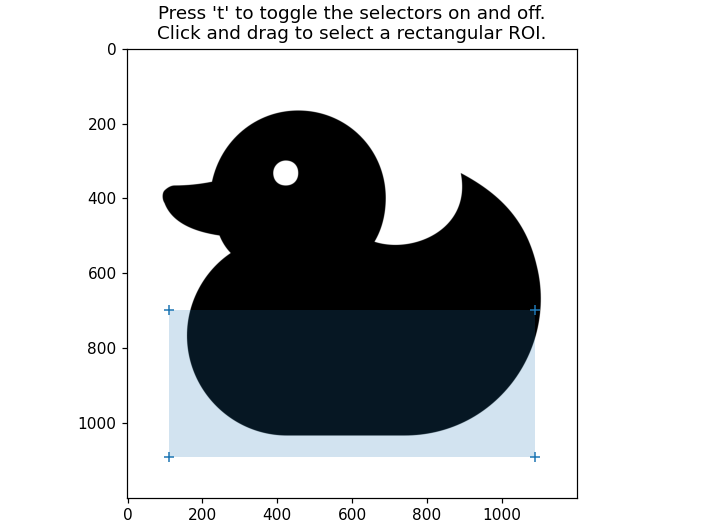

In [5]:
fig = plt.figure(layout='constrained')
ax = fig.subplots(1)

img = plt.imread('data/duck.png')
ax.imshow(img)

ax.set_title(f"Click and drag to select a rectangular ROI.")
selector = RectangleSelector(
        ax, select_callback,
        useblit=True,
        button=[1, 3],  # disable middle button
        minspanx=5, minspany=5,
        spancoords='pixels',
        interactive=True)

# Activate the toggling of selection in the figure
# It is not needed but a nice addition
fig.canvas.mpl_connect('key_press_event', toggle_selector)
ax.set_title("Press 't' to toggle the selectors on and off.\n" + ax.get_title());

# Use the selected region 

In [6]:
x_corners=selector.corners[0]
y_corners=selector.corners[1]
ax.plot(x_corners,y_corners,'+');

In [7]:
# Convert the coordinates of selected region to a ROI (x0,y0,x1,y1)
def selector_corners_to_roi(sel) :
    x=selector.corners[0]
    y=selector.corners[1]
    roi = [x[0],y[0],x[2],y[2]]
    return np.array(roi)

add a rectangular patch in the figure 

In [8]:
roi = selector_corners_to_roi(selector)
R = patches.Rectangle(xy=roi[0:2],width=roi[2]-roi[0], height=roi[3]-roi[1], alpha=0.2)
ax.add_patch(R);

Note that the patch is only visible when you unselect the ROI.

# Show the selection 

At last we will show the selection in a new figure. Note here that the coordinates in the ROI are (x0,y0,x1,y1) but the numpy arrays are in rows and columns.

<IPython.core.display.Javascript object>


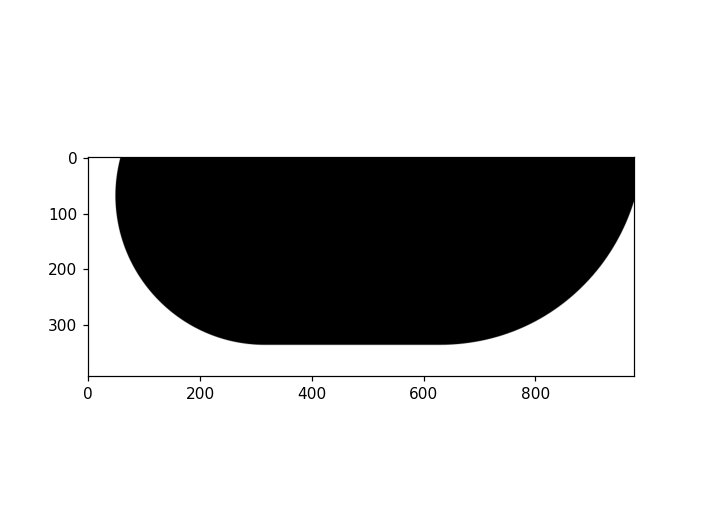

In [9]:
fig,axs=plt.subplots(1)

roi = roi.astype(int)
axs.imshow(img[roi[1]:roi[3],roi[0]:roi[2]])